In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
def generateChem(df):
    aa = df[['Row', 'Component', 'd 13C/12C']]
    aa = aa.drop(aa[aa['Component'] == 'Blank'].index)
    
    aa = aa.drop(aa[pd.isna(aa['Component'])].index)

    out = aa.pivot(index='Row', columns='Component', values='d 13C/12C').bfill().iloc[[0],:]
    out.insert(0, 'Identifier 1', df['Identifier 1'].unique())
    out.insert(1, 'Identifier 2', df['Identifier 2'].unique())

    out.columns.name = None

    return out

file_Name = "24Sept19.xls"
file_Path = "/Users/quinnvinlove/Documents/sugarsBio/excel/"

df = pd.read_excel(file_Path + file_Name)

_all = pd.concat([generateChem(df2) for _, df2 in df.groupby(['Identifier 1', 'Identifier 2'])])
_all = _all.sort_index()

In [72]:
#eliminate data points > or < 2sd from mean!

ala_all = _all[_all['Identifier 1'] != 'AA std']['Asp']
std = np.std(ala_all)
mean = np.mean(ala_all)

over = ala_all[(ala_all < (mean - (2*std))) | (ala_all > (mean + (2*std)))].index
ala_all.drop(over)

Row
3    -25.664
4    -25.823
5    -25.939
7    -25.337
8    -25.353
9    -25.456
11   -25.288
12   -25.127
13   -25.183
15   -25.133
16   -25.088
17   -25.184
19   -25.402
20   -25.146
21   -25.101
23   -25.528
24   -25.701
25   -25.626
27   -25.617
28   -25.531
29   -25.719
31   -25.577
32   -25.532
33   -25.499
35   -26.226
36   -26.219
37   -26.116
39   -24.936
40   -24.988
41   -24.975
47   -25.440
48   -25.415
49   -25.562
51   -26.137
52   -26.141
53   -26.218
Name: Asp, dtype: float64

0.3602399149293205

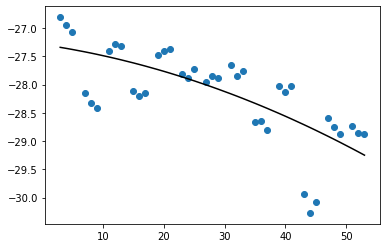

0.3602399149293205

In [65]:
#fit linear model
plt.scatter(x=ala_all.index, y=ala_all.values)

#reshape values
X = np.array(ala_all.index).reshape(-1, 1)
y = np.array(ala_all.values).reshape(-1, 1)

#create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#create polynomial scaling
pf = PolynomialFeatures(degree=2)
pf.fit(X)
X_poly_train = pf.transform(X_train)
X_poly_test = pf.transform(X_test)

#fit to train
clf = LinearRegression().fit(X_poly_train, y_train)

#plot line
model_range_transform = pf.transform(X)
plt.plot(X, clf.predict(model_range_transform), color='black')

#calc r squared with test portion of data
r2 = r2_score(y_test, clf.predict(X_poly_test))
display(r2)

#show plot
plt.show()

def reg(data, degree):
    #reshape values
    X = np.array(data.index).reshape(-1, 1)
    y = np.array(data.values).reshape(-1, 1)

    #create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #create polynomial scaling
    pf = PolynomialFeatures(degree=2)
    pf.fit(X)
    X_poly_train = pf.transform(X_train)
    X_poly_test = pf.transform(X_test)

    #fit to train
    clf = LinearRegression().fit(X_poly_train, y_train)

    #calc r squared with test portion of data
    r2 = r2_score(y_test, clf.predict(X_poly_test))

    return r2

display(reg(ala_all, 2))

In [73]:
def reg(data, degree):
    #reshape values
    X = np.array(data.index).reshape(-1, 1)
    y = np.array(data.values).reshape(-1, 1)

    #create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #create polynomial scaling
    pf = PolynomialFeatures(degree=degree)
    pf.fit(X)
    X_poly_train = pf.transform(X_train)
    X_poly_test = pf.transform(X_test)

    #fit to train
    clf = LinearRegression().fit(X_poly_train, y_train)

    #calc r squared with test portion of data
    r2 = r2_score(y_test, clf.predict(X_poly_test))

    return r2

rs = [reg(ala_all, i) for i in range(0, 20)]

display(rs.index(max(rs)))


7

In [87]:
temp_aa = _all[_all['Identifier 1'] == 'AA std']
temp_aa = temp_aa.drop(['Identifier 1', 'Identifier 2'], axis=1)

def remove_out(data):
    std = np.std(data)
    mean = np.mean(data)

    over = data[(data < (mean - (2*std))) | (data > (mean + (2*std)))].index
    return data.drop(over)

for compound in temp_aa:
    data = temp_aa[compound].dropna()
    data = remove_out(data)
    if len(data) > 0:
        rs = [reg(data, i) for i in range(0, 30)]
        display(compound)
        display(max(rs))
        display(rs.index(max(rs)))

'Ala'

0.7703760044528334

4

'Asp'

0.6423939846726245

1

'Asp1'

0.29591363798067905

4

'CO2-1'

0.36996912582513186

2

'CO2-2'

0.0

0

'CO2-3'

0.0

0

'CO2-4'

0.5598225089164237

2

'CO2-5'

0.028658767750813552

4

'CO2-6'

0.8954653330429954

2

'CO2-7'

0.9662377652037976

6

'CO2-8'

0.0

0

'CO2-9'

-0.06406666666651017

0

'Caffeine'

0.605332726482064

7

'Glu'

0.284404317901496

3

'Gly'

-0.06756198473750219

0

'His'

0.6091391266954361

4

'His1'

0.7935186822684528

2

'Ile'

0.9113272678959975

14

'Leu'

-0.12891513440931557

0

'Lys'

-1.393781804108948

0

'Met'

0.3073550942962412

9

'Met1'

-3.6736111111111924

0

'Nonadecane'

-2.2075530348125088

1

'Phe'

0.5287566766964609

2

'Pro'

0.15873474994487902

2

'Ser'

0.4447248185771997

1

'Ser1'

-0.0162437524029182

0

'Thr'

0.7900720766087665

4

'Tyr'

-0.12970768046324288

1

'Val'

0.7317764765923072

5

'nLeu'

0.29623643450818515

4

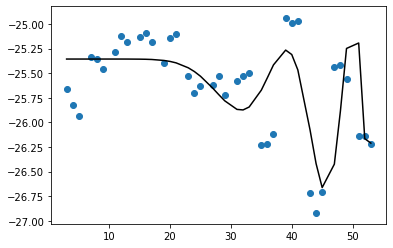

In [96]:
class reg_plus:
    def __init__(self, X, y):
        self.X = np.array(X).reshape(-1, 1)
        self.y = np.array(y).reshape(-1, 1)
        
    def find_best_model(self, max_degree=20):
        best_r2 = np.NINF
        for i in range(0, max_degree):
            r2, clf = self.reg(i)
            if r2 > best_r2:
                self.model = clf
                self.deg = i
        
    def predict(self, X):
        X_deploy = np.array(X).reshape(-1, 1)
        X_deploy = PolynomialFeatures(degree=self.deg).fit_transform(X_deploy)
        return self.model.predict(X_deploy)
        
    def reg(self, degree):
        pf = PolynomialFeatures(degree=degree)
        pf.fit(self.X)
        
        #create train/test split
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        #create polynomial scaling
        X_poly_train = pf.transform(X_train)
        X_poly_test = pf.transform(X_test)

        #fit to train
        clf = LinearRegression().fit(X_poly_train, y_train)

        #calc r squared with test portion of data
        r2 = r2_score(y_test, clf.predict(X_poly_test))

        return r2, clf

    
hello = reg_plus(ala_all.index, ala_all.values)
hello.find_best_model()

plt.scatter(ala_all.index, ala_all.values)
plt.plot(ala_all.index, hello.predict(ala_all.index), c='black')

plt.show()

higher is better for r2